In [27]:
import pandas as pd
from scipy.io import arff

In [28]:
data, meta = arff.loadarff('D:/Downloads/phpvcoG8S.arff')

In [29]:
meta

Dataset: out
	Airline's type is nominal, range is ('US', 'AA', 'AS', 'CO', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV', 'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN')
	Flight's type is numeric
	AirportFrom's type is nominal, range is ('PHX', 'LAX', 'SFO', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI', 'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK', 'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR', 'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM', 'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA', 'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL', 'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK', 'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW', 'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD', 'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX', 'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL', 'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB', 'CLT', 'LEX', 'MB

In [30]:
data

array([(b'CO',  269., b'SFO', b'IAH', b'3',   15., 205., b'1'),
       (b'US', 1558., b'PHX', b'CLT', b'3',   15., 222., b'1'),
       (b'AA', 2400., b'LAX', b'DFW', b'3',   20., 165., b'1'), ...,
       (b'FL',  609., b'SFO', b'MKE', b'5', 1439., 255., b'0'),
       (b'UA',   78., b'HNL', b'SFO', b'5', 1439., 313., b'1'),
       (b'US', 1442., b'LAX', b'PHL', b'5', 1439., 301., b'1')],
      dtype=[('Airline', 'S2'), ('Flight', '<f8'), ('AirportFrom', 'S3'), ('AirportTo', 'S3'), ('DayOfWeek', 'S1'), ('Time', '<f8'), ('Length', '<f8'), ('Delay', 'S1')])

In [31]:
df = pd.DataFrame(data)

In [32]:
df.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      539383 non-null  object 
 1   Flight       539383 non-null  float64
 2   AirportFrom  539383 non-null  object 
 3   AirportTo    539383 non-null  object 
 4   DayOfWeek    539383 non-null  object 
 5   Time         539383 non-null  float64
 6   Length       539383 non-null  float64
 7   Delay        539383 non-null  object 
dtypes: float64(3), object(5)
memory usage: 32.9+ MB


In [34]:
df.duplicated().sum()

216618

In [46]:
df2 = df.drop_duplicates()
df2 # As prescribed, dropping the duplicate entries.

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,b'CO',269.0,b'SFO',b'IAH',b'3',15.0,205.0,b'1'
1,b'US',1558.0,b'PHX',b'CLT',b'3',15.0,222.0,b'1'
2,b'AA',2400.0,b'LAX',b'DFW',b'3',20.0,165.0,b'1'
3,b'AA',2466.0,b'SFO',b'DFW',b'3',20.0,195.0,b'1'
4,b'AS',108.0,b'ANC',b'SEA',b'3',30.0,202.0,b'0'
...,...,...,...,...,...,...,...,...
539363,b'DL',1002.0,b'SLC',b'JFK',b'5',1425.0,264.0,b'1'
539365,b'US',119.0,b'KOA',b'PHX',b'5',1425.0,349.0,b'1'
539367,b'UA',86.0,b'HNL',b'LAX',b'5',1428.0,333.0,b'0'
539374,b'DL',2354.0,b'LAX',b'ATL',b'5',1435.0,255.0,b'0'


In [47]:
columns_to_decode = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay']

# Decode each column
for col in columns_to_decode:
    df2.loc[:, col] = df2[col].str.decode('utf-8')

# Print the DataFrame after decoding
print(df2)

       Airline  Flight AirportFrom AirportTo DayOfWeek    Time  Length Delay
0           CO   269.0         SFO       IAH         3    15.0   205.0     1
1           US  1558.0         PHX       CLT         3    15.0   222.0     1
2           AA  2400.0         LAX       DFW         3    20.0   165.0     1
3           AA  2466.0         SFO       DFW         3    20.0   195.0     1
4           AS   108.0         ANC       SEA         3    30.0   202.0     0
...        ...     ...         ...       ...       ...     ...     ...   ...
539363      DL  1002.0         SLC       JFK         5  1425.0   264.0     1
539365      US   119.0         KOA       PHX         5  1425.0   349.0     1
539367      UA    86.0         HNL       LAX         5  1428.0   333.0     0
539374      DL  2354.0         LAX       ATL         5  1435.0   255.0     0
539377      B6   739.0         JFK       PSE         5  1439.0   223.0     1

[322765 rows x 8 columns]


In [52]:
type(df2['DayOfWeek'][0])

str

In [53]:
df2.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [16]:
df2.to_csv('airlines_data.csv', index=False)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322765 entries, 0 to 539377
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      322765 non-null  object 
 1   Flight       322765 non-null  float64
 2   AirportFrom  322765 non-null  object 
 3   AirportTo    322765 non-null  object 
 4   DayOfWeek    322765 non-null  object 
 5   Time         322765 non-null  float64
 6   Length       322765 non-null  float64
 7   Delay        322765 non-null  object 
dtypes: float64(3), object(5)
memory usage: 22.2+ MB


In [17]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print(f"Numerical Columns: {numerical_columns}\nCategorical Columns: {categorical_columns}")

Numerical Columns: Index(['Flight', 'Time', 'Length'], dtype='object')
Categorical Columns: Index(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], dtype='object')


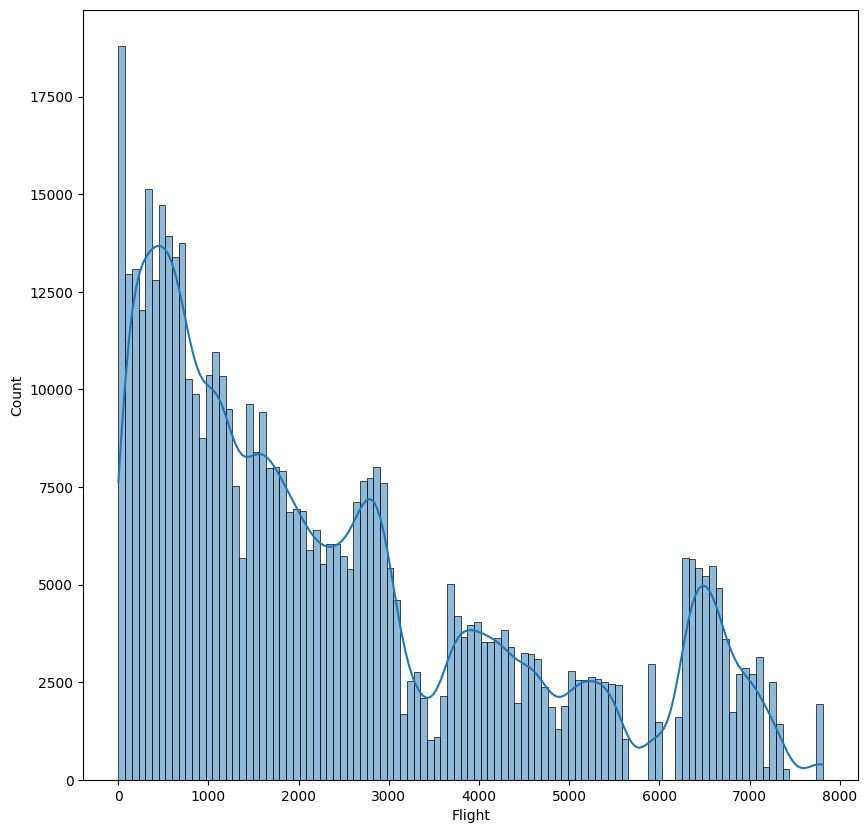

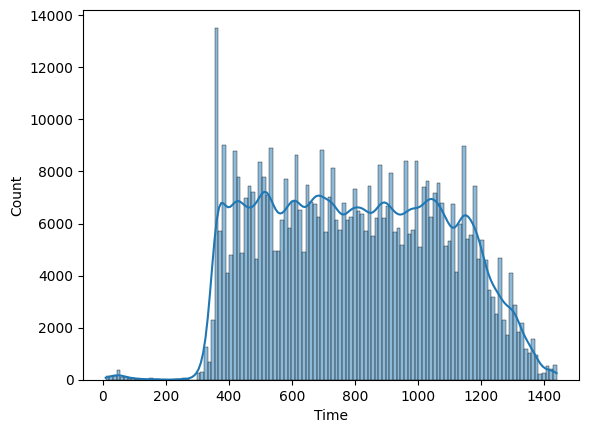

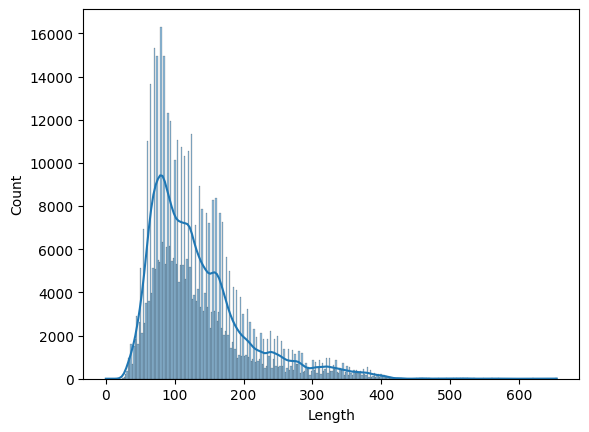

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
x = 1
for i in numerical_columns: 
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()